In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
DATADIR_TRAIN = "../train_bird"
DATADIR_VALID = "../validation_bird"
DATADIR_TEST = "../test_bird"
CATEGORIES = ["bird", "duck"]

In [3]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("../train_bird",
                                          target_size=(224,224),
                                          batch_size = 32,
                                          class_mode = 'binary')
                                         
validation_dataset = test.flow_from_directory("../validation_bird",
                                          target_size=(224,224),
                                          batch_size =32,
                                          class_mode = 'binary')

Found 222 images belonging to 2 classes.
Found 26 images belonging to 2 classes.


In [4]:
validation_dataset.class_indices

{'bird': 0, 'duck': 1}

In [5]:
train_dataset.class_indices

{'bird': 0, 'duck': 1}

In [6]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cat or 1 for Dog 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
#steps_per_epoch = train_imagesize/batch_size

model.fit(train_dataset,
         epochs = 20, batch_size=10,
         validation_data = validation_dataset  
         )

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 0.9333 - accuracy: 0.5315 - val_loss: 0.8176 - val_accuracy: 0.5000
Epoch 2/20
7/7 [==============================] - 7s 968ms/step - loss: 0.6370 - accuracy: 0.6757 - val_loss: 0.7566 - val_accuracy: 0.5769
Epoch 3/20
7/7 [==============================] - 7s 993ms/step - loss: 0.5056 - accuracy: 0.7252 - val_loss: 1.4404 - val_accuracy: 0.5769
Epoch 4/20
7/7 [==============================] - 7s 1s/step - loss: 0.6352 - accuracy: 0.6532 - val_loss: 0.6248 - val_accuracy: 0.6538
Epoch 5/20
7/7 [==============================] - 7s 1s/step - loss: 0.4456 - accuracy: 0.8333 - val_loss: 1.4018 - val_accuracy: 0.5000
Epoch 6/20
7/7 [==============================] - 7s 1s/step - loss: 0.2892 - accuracy: 0.8784 - val_loss: 1.0868 - val_accuracy: 0.6154
Epoch 7/20
7/7 [==============================] - 7s 1s/step - loss: 0.1935 - accuracy: 0.9144 - val_loss: 0.6604 - val_accuracy: 0.7308
Epoch 8/20
7/7 [===================

#steps_per_epoch = train_imagesize/batch_size

model.fit_generator(train_dataset,
         steps_per_epoch = 250,
         epochs = 10,
         validation_data = test_dataset
       
         )

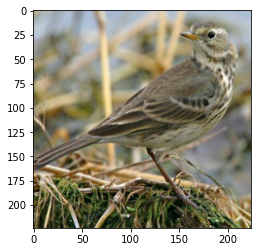

Bird


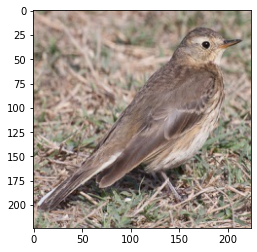

Bird


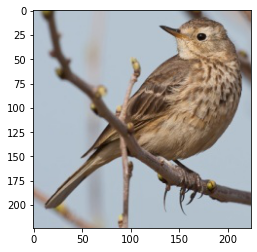

Bird


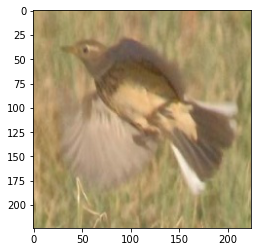

Bird


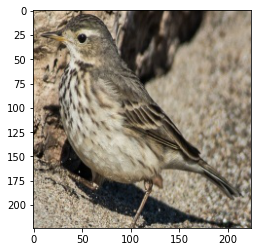

Bird


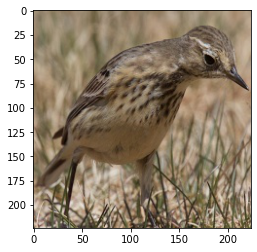

Bird


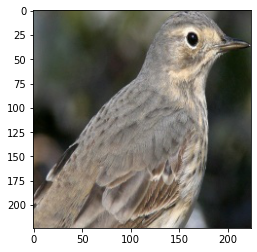

Duck


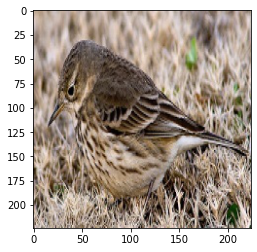

Bird


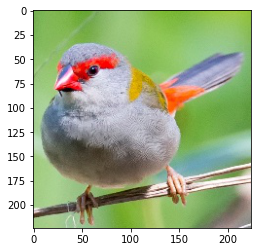

Duck


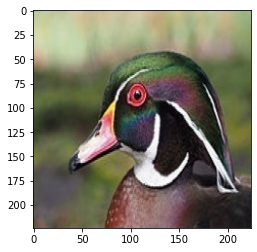

Duck


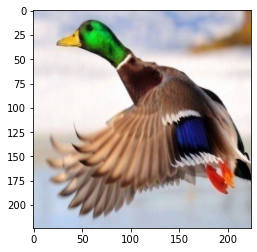

Bird


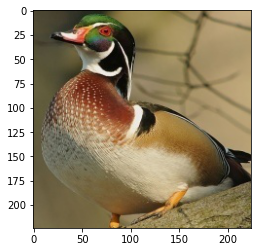

Duck


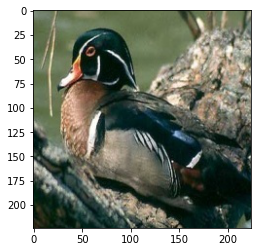

Duck


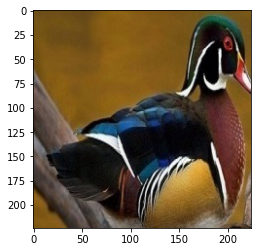

Duck


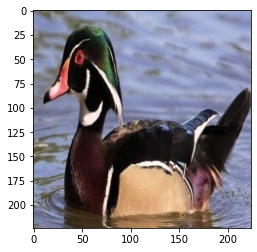

Duck


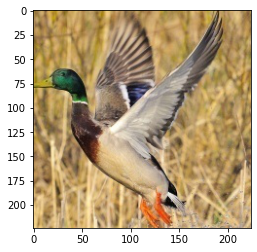

Bird


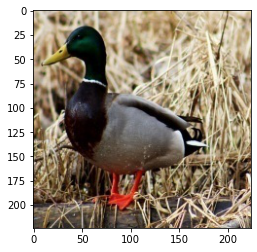

Bird


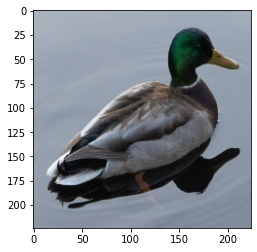

Duck


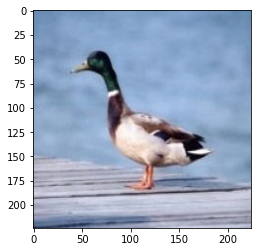

Duck


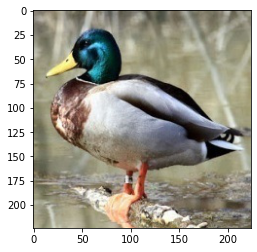

Duck


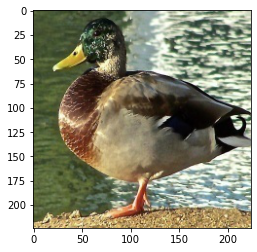

Duck


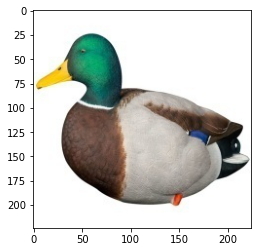

Duck


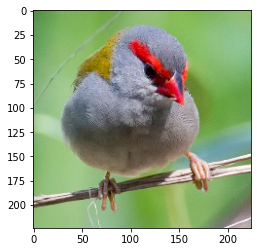

Duck


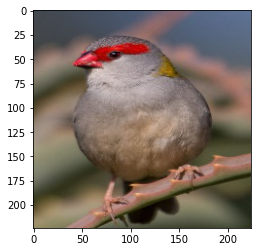

Bird


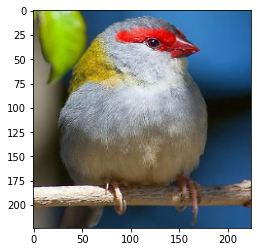

Duck


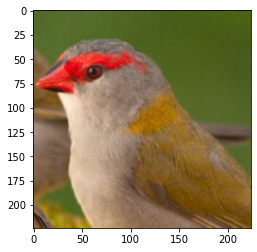

Bird
Bird: 12, Duck: 14


In [9]:
# Manually Predicting 
test_path = '../test_bird1'
Bird=0
Duck=0
for i in os.listdir(test_path):
    img = image.load_img(test_path + "//" +i, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        Bird +=1
        print('Bird')
    else:
        Duck +=1
        print('Duck')
print(f'Bird: {Bird}, Duck: {Duck}')

def predictImage(filename):
    img1 = image.load_img(filename,target_size=(224,224))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        
        plt.xlabel("Duck",fontsize=20)
        
    
    elif val == 0:
        
        plt.xlabel("Bird",fontsize=20)

    

predictImage(file_directory)